# Initialize libraries and reading the datas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the csv file
df = pd.read_csv("/content/drive/MyDrive/ML/dataset.csv", index_col=None)

In [ ]:
# Show the first columns of the dataset.
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


# Change the value to binary

In [ ]:
# Change the values to 0/1
df["Fever"] = df["Fever"].map({'Yes': 1, 'No': 0})
df["Cough"] = df["Cough"].map({'Yes': 1, 'No': 0})
df["Fatigue"] = df["Fatigue"].map({'Yes': 1, 'No': 0})
df["Difficulty Breathing"] = df["Difficulty Breathing"].map(
    {'Yes': 1, 'No': 0})
df["Gender"] = df["Gender"].map({'Male': 1, 'Female': 0})

# Change the values to 0/2/1
df["Blood Pressure"] = df["Blood Pressure"].map(
    {'High': 2, 'Normal': 1, 'Low': 0})
df["Cholesterol Level"] = df["Cholesterol Level"].map(
    {'High': 2, 'Normal': 1, 'Low': 0})

for i in range(len(df["Age"])):
    if df["Age"][i] <= 20:
        df["Age"][i] = 0
    elif df["Age"][i] > 20 and df["Age"][i] <= 25:
        df["Age"][i] = 1
    elif df["Age"][i] >= 25 and df["Age"][i] < 30:
        df["Age"][i] = 2
    else:
        df["Age"][i] = 3


<ipython-input-8-0db891aea70b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][i] = 0
<ipython-input-8-0db891aea70b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][i] = 1
<ipython-input-8-0db891aea70b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][i] = 2
<ipython-input-8-0db891aea70b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [ ]:
# Show the first columns of the dataset after changing the values
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,0,0,0,1,Positive
1,Common Cold,0,1,1,0,1,0,1,1,Negative
2,Eczema,0,1,1,0,1,0,1,1,Negative
3,Asthma,1,1,0,1,1,1,1,1,Positive
4,Asthma,1,1,0,1,1,1,1,1,Positive


# Calculate the KNN algorithm (From scratch)

In [ ]:
# Calculate the distance of x and y
def dist(x, y):
    return np.linalg.norm(x-y)

In [ ]:
# This is the Knn function witch is works with 3 arguments:
# k, the number that shows us how many indexes we should find
# dataset, the main data that we use
# v, is the NumPy array that contains all the parameters for use
def knn(k, dataset, v):
    name = v['Disease']
    v = v[1:9]
    desease_list = []
    indexes = []
    for index, row in dataset.iterrows():
        if (dataset['Disease'][index] == name):
            indexes.append(index)
            desease_list.append(df.iloc[index, 1:9].to_numpy().astype('float64'))

    print(f'Indexes of {name} disease: {indexes}')

    v2data = [dist(v, desease_list[i]) for i in range(len(desease_list))]
    sorted = np.argsort(v2data)

    l = []
    if len(indexes) < k:
        k = len(indexes)
    for i in range(0, k):
        l.append(dataset.loc[indexes[sorted[i]], 'Outcome Variable'])


    print(f'{k} Sorted Indexes: {[indexes[sorted[i]] for i in range(0, k)]}')
    print(f'Best {k} Outcomes Variable: {l}')
    if k == 0:
        return "Negative"
    return max(l, key=l.count)

In [ ]:
# Give the knn function a sample like v
v = df.iloc[8, 0:9]
print(v)
knn(4, df, v)

Disease                 Hyperthyroidism
Fever                                 0
Cough                                 1
Fatigue                               0
Difficulty Breathing                  0
Age                                   2
Gender                                0
Blood Pressure                        1
Cholesterol Level                     1
Name: 8, dtype: object
Indexes of Hyperthyroidism disease: [8, 9, 66, 81, 82, 134, 277]
4 Sorted Indexes: [8, 9, 66, 277]
Best 4 Outcomes Variable: ['Negative', 'Negative', 'Negative', 'Negative']


'Negative'

# Test scoring and split the train and test data

In [ ]:
# Use 20% of data for testing
test= df.sample(frac=0.08)
train = df.sample(frac=1)

for i in range(len(test)):
    train = train.drop(test.index[i], axis='index')

print(f'all column of dataframe: {len(df)}')
print(f'all column of testset: {len(test)}')
print(f'all column of trainset: {len(train)}')
indexes_of_test = []
for i in range(0, len(test)):
    indexes_of_test.append(i)
test = test.set_axis(indexes_of_test)

indexes_of_train = []
for i in range(0, len(train)):
    indexes_of_train.append(i)
train = train.set_axis(indexes_of_train)

all column of dataframe: 349
all column of testset: 28
all column of trainset: 321


In [ ]:
# Calculate the Y of test and compare it with Y of train and save them
predict = [knn(3, train, test.iloc[i, 0:9]) for i in range(len(test))]
t= []
for i in range(len(test)):
    t.append(test.loc[i, "Outcome Variable"])

Indexes of Hepatitis disease: [209, 307]
2 Sorted Indexes: [209, 307]
Best 2 Outcomes Variable: ['Negative', 'Negative']
Indexes of Bronchitis disease: [49, 149, 168, 237, 263, 284]
3 Sorted Indexes: [149, 49, 263]
Best 3 Outcomes Variable: ['Negative', 'Negative', 'Positive']
Indexes of Influenza disease: [76, 187, 189, 194, 245, 260, 303]
3 Sorted Indexes: [76, 194, 245]
Best 3 Outcomes Variable: ['Positive', 'Positive', 'Negative']
Indexes of Stroke disease: [25, 52, 62, 85, 96, 115, 122, 144, 196, 223, 234, 244, 299, 309]
3 Sorted Indexes: [234, 25, 85]
Best 3 Outcomes Variable: ['Positive', 'Negative', 'Positive']
Indexes of Stroke disease: [25, 52, 62, 85, 96, 115, 122, 144, 196, 223, 234, 244, 299, 309]
3 Sorted Indexes: [62, 244, 299]
Best 3 Outcomes Variable: ['Positive', 'Positive', 'Positive']
Indexes of Chronic Obstructive Pulmonary Disease (COPD) disease: [65, 192]
2 Sorted Indexes: [65, 192]
Best 2 Outcomes Variable: ['Negative', 'Positive']
Indexes of Asthma disease: [30

In [ ]:
# Gives us the accuracy score
accuracy_score(t, predict)

0.6071428571428571

# Drawing the ROC plot

In [ ]:
# Convert Positive and Negative to 1 and 0 for calculating the ROC
y_true = []
y_pred= []
for i in range(len(predict)):
    if predict[i] == "Positive":
        y_pred.append(1)
    else:
        y_pred.append(0)

    if t[i] == "Positive":
        y_true.append(1)
    else:
        y_true.append(0)

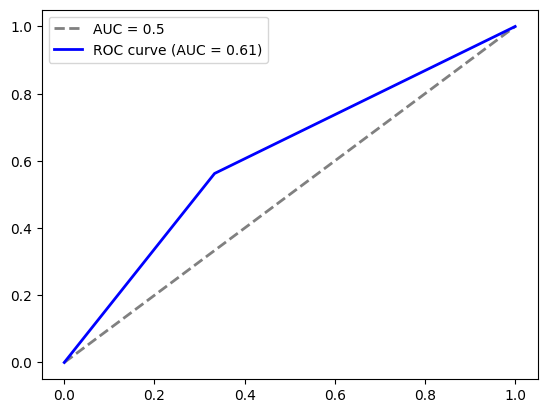

In [ ]:
# Drawing the ROC plot
fpr, tpr, threshholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', lw=2,
         linestyle='--', label='AUC = 0.5 ')
plt.plot(fpr, tpr, color='blue', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.show()

# Analyse the Curve

ROC stands for receiver operating characteristic curve,

The ROC plot use for measure which model is the best for our problem and measure the score of the model which depends on 'k', the test, and the train size.

Due to the plot axises, which are True-Posetive-Rate for y-axis, and False-Positive-Rate for x-axis, we could know the score with the area under the curve.

we can our curve that is higher than the 0.5 rate and it's good enough to use it.